In [ ]:
Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [ ]:
Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
import pandas as pd
df=pd.read_csv('data/Train.csv')



In [2]:
df_test=pd.read_csv('data/Test.csv')


In [3]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:

Data exploration

In [4]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
df.tail()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
Data Visualisation


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

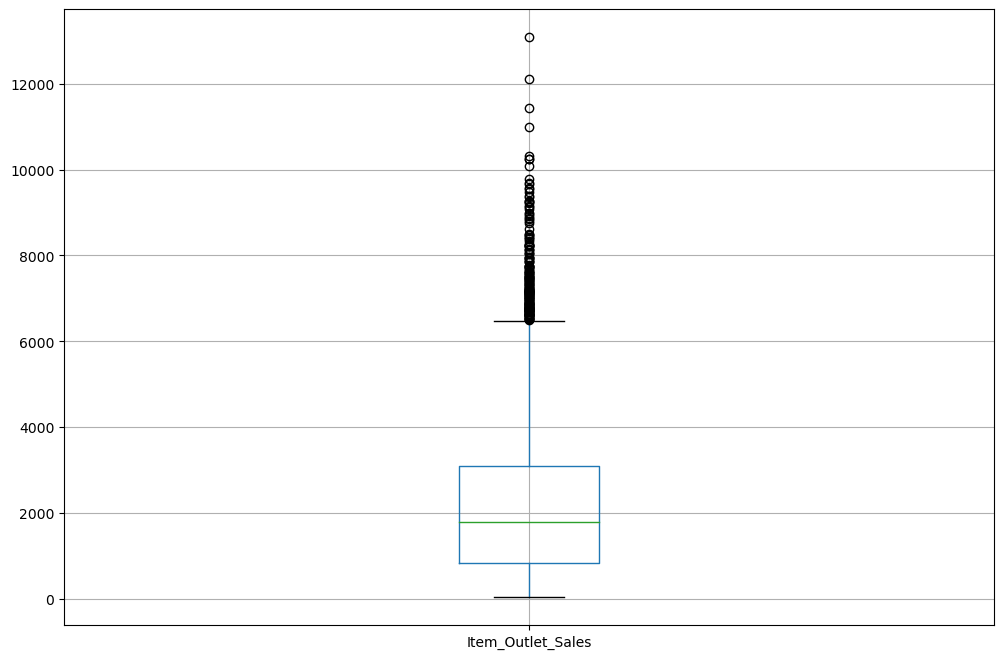

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
df.boxplot(column=['Item_Outlet_Sales'], ax=ax)
plt.show()

In [14]:
df['Item_Weight'].isnull().sum()


1463

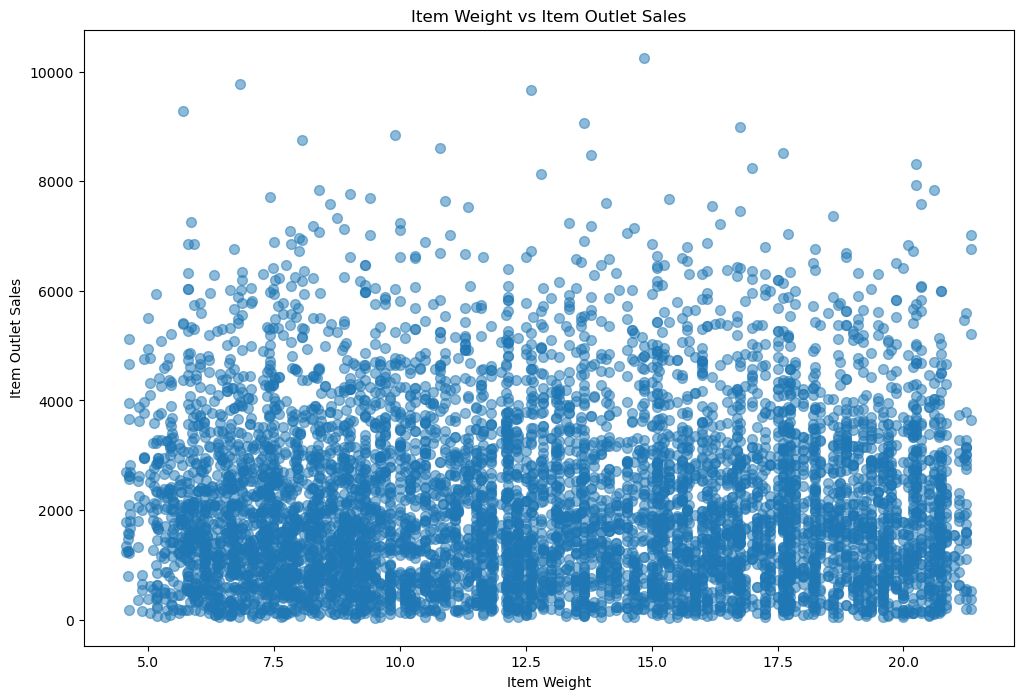

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=df['Item_Weight'], y=df['Item_Outlet_Sales'], s=50, alpha=0.5)
plt.title('Item Weight vs Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

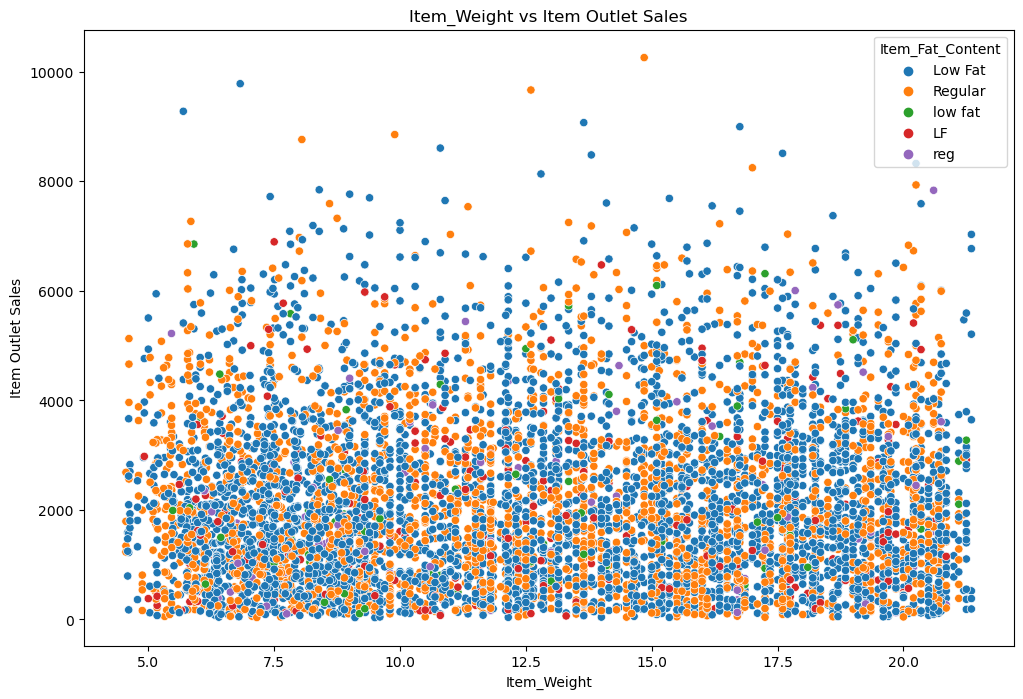

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Fat_Content', data=df)
plt.title('Item_Weight vs Item Outlet Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

In [ ]:
Item_MRP Distribution

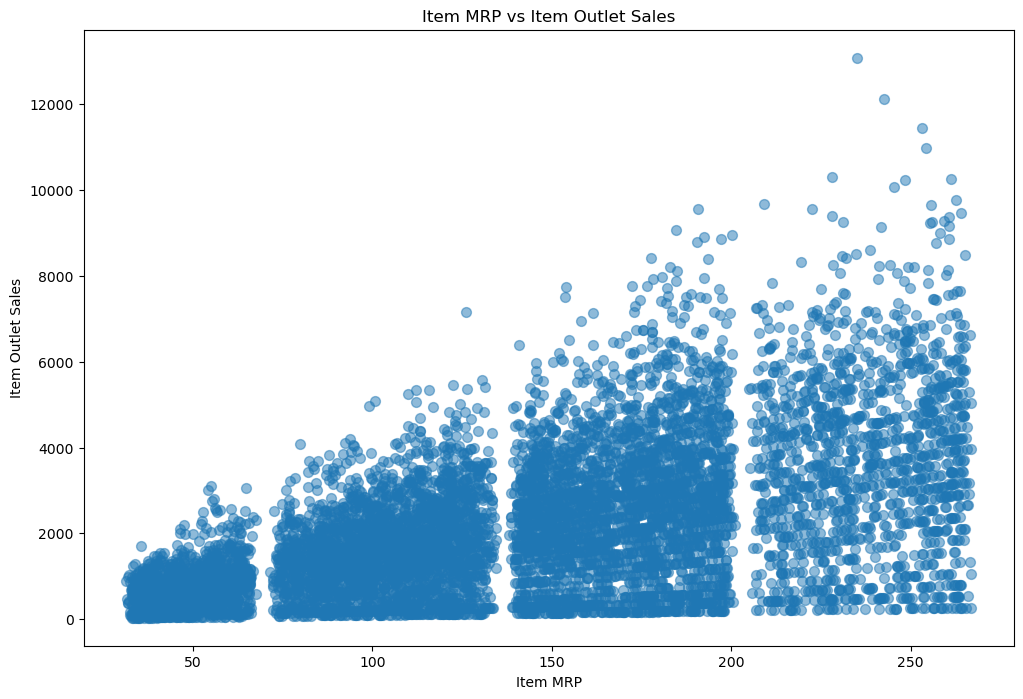

In [20]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=df['Item_MRP'], y=df['Item_Outlet_Sales'], s=50, alpha=0.5)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

In [ ]:
 Explotaory Data Analysis

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [24]:
df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [ ]:
Univariate Analysis

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

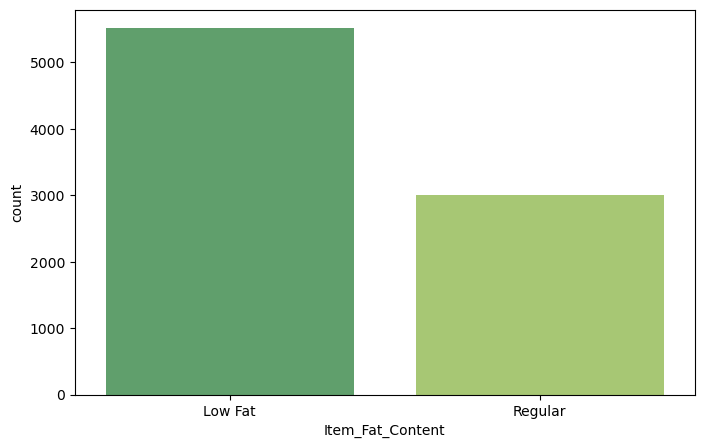

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,palette='summer')

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

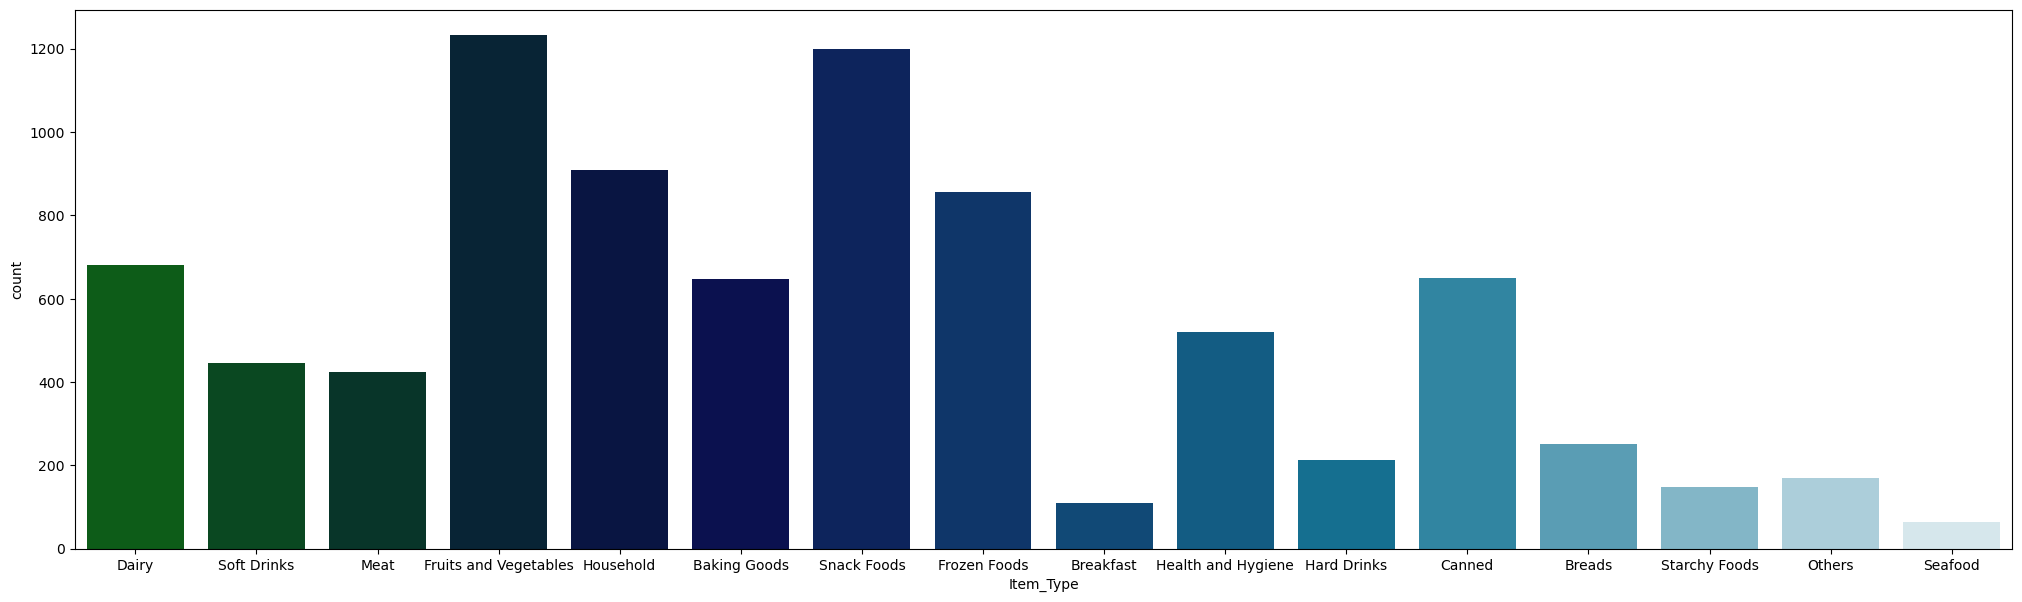

In [27]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df,palette='ocean')

In [ ]:
Observations:

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

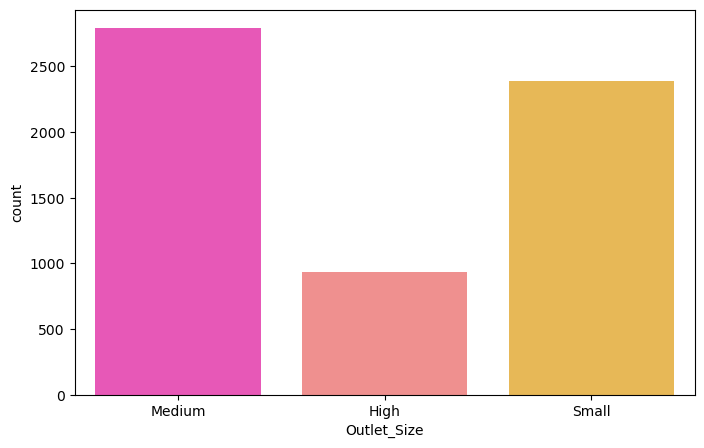

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df,palette='spring')

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

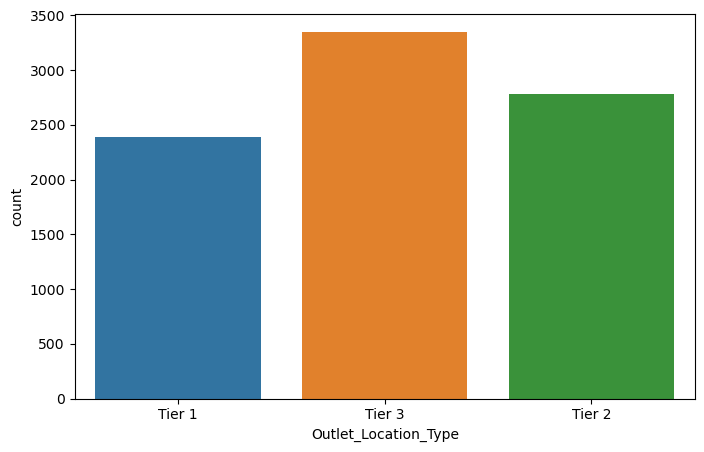

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df)

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Years_Established', ylabel='count'>

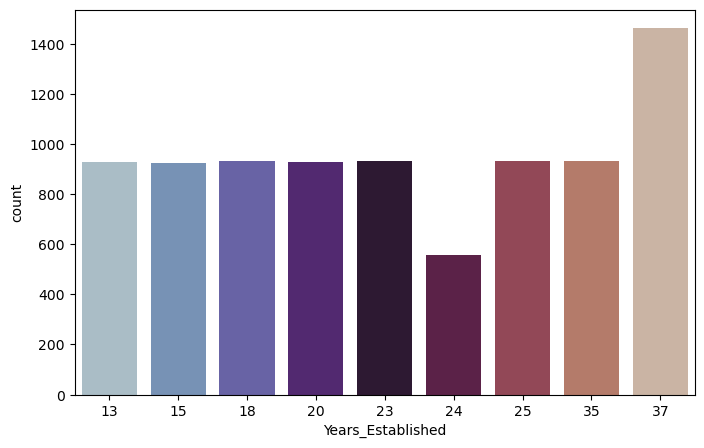

In [30]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=df,palette='twilight')

In [ ]:
Bivariet Analysis

In [32]:
Top_Item_Type = df.groupby(["Item_Type"]).sum().sort_values("Item_Outlet_Sales", ascending=False).head(10)
Top_Item_Type = Top_Item_Type[["Item_Outlet_Sales"]].round(2) 
Top_Item_Type.reset_index(inplace=True)

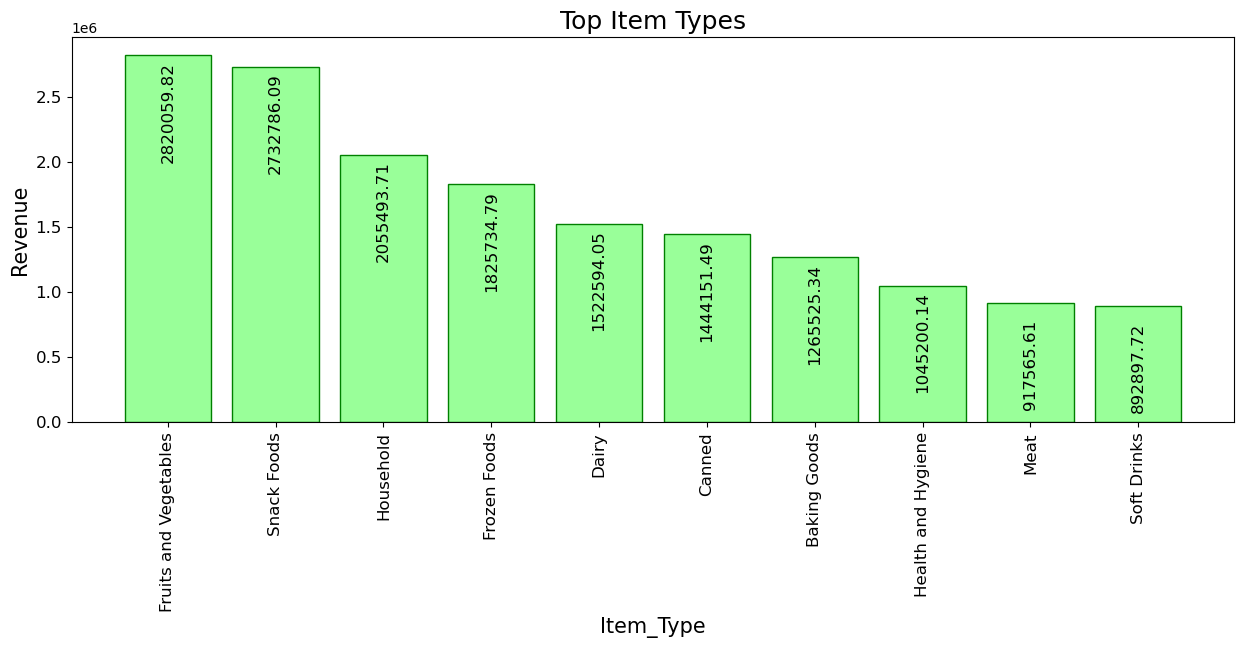

In [33]:
plt.figure(figsize = (15,5)) # width and height of figure is defined in inches
plt.title("Top Item Types", fontsize=18) 
plt.bar(Top_Item_Type["Item_Type"], Top_Item_Type["Item_Outlet_Sales"],color= '#99ff99',edgecolor='green', linewidth = 1)
plt.xlabel("Item_Type",fontsize=15) # x axis shows the Item_Type
plt.ylabel("Revenue",fontsize=15) # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_Item_Type["Item_Outlet_Sales"].items(): #To show the exact revenue generated on the figure
    plt.text(k,v-800000,str(v), fontsize=12,rotation=90,color='k', ha='center');

In [ ]:
Let's find out which Oulet_Locations_Type generated the highest revenue!

In [34]:
Oulet_Locations_Type = df.groupby(["Outlet_Location_Type"]).sum().sort_values("Item_Outlet_Sales", ascending=False) # Sort the Item_Type as per the Item_Outlet_Sales
Oulet_Locations_Type = Oulet_Locations_Type[["Item_Outlet_Sales"]] # keep only the sales column in the dataframe
total_revenue_Type = Oulet_Locations_Type["Item_Outlet_Sales"].sum() # To find the total revenue generated as per category
total_revenue_Type = str(int(total_revenue_Type)) # Convert the total_revenue_category from float to int and then to string
#total_revenue_Type = '$' + total_revenue_category # Adding '$' sign before the Value
Oulet_Locations_Type.reset_index(inplace=True)

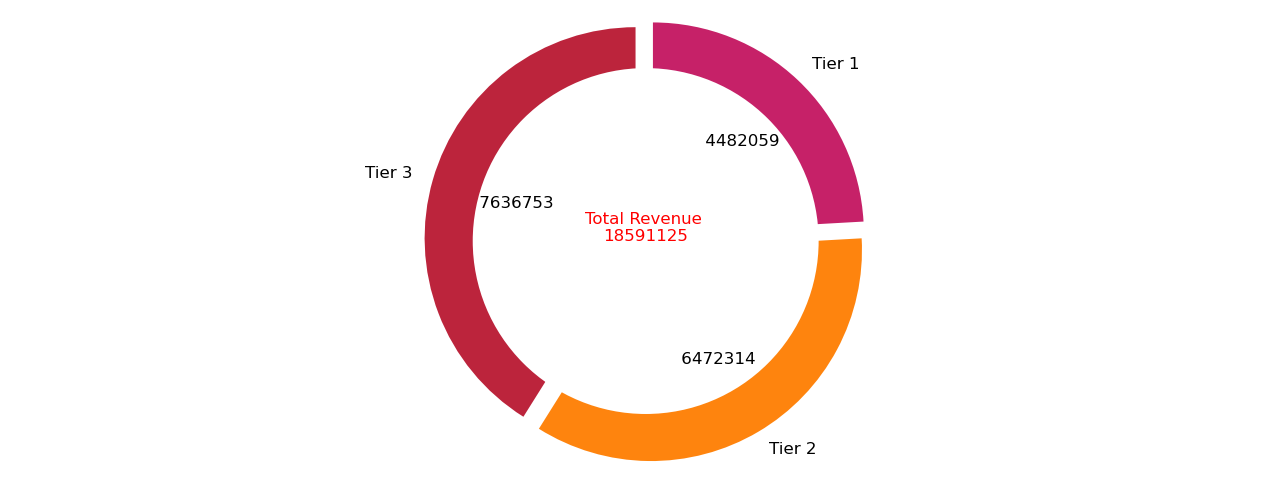

In [35]:
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' {v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Oulet_Locations_Type["Item_Outlet_Sales"], colors = colors, labels=Oulet_Locations_Type["Outlet_Location_Type"], autopct= autopct_format(Oulet_Locations_Type["Item_Outlet_Sales"]), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_Type),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
We can see that Outlet_Location_Type - Tier 3 generated the highest revenue of about - 7636753!

The Total Revenue generated by all the Outlet_Location_Type - 18591125!

In [ ]:
Multivariet Analysis

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


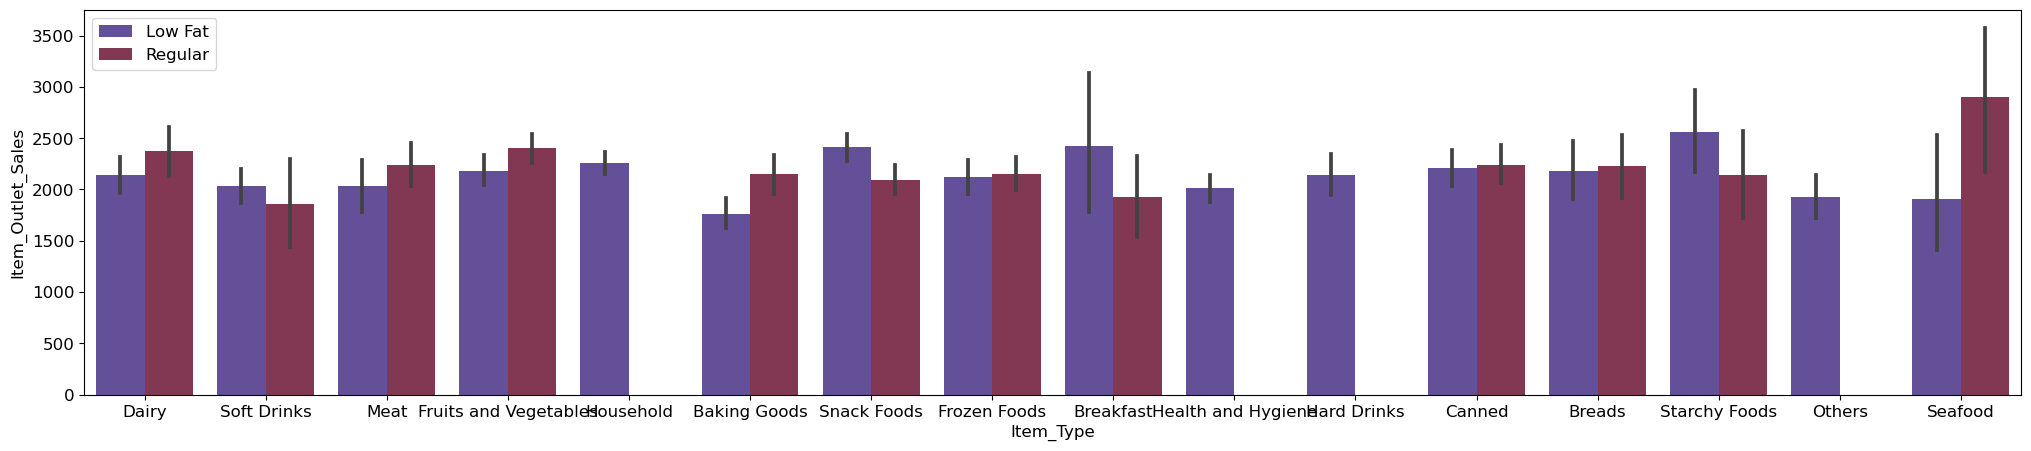

In [36]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df,palette='twilight')
plt.legend()

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


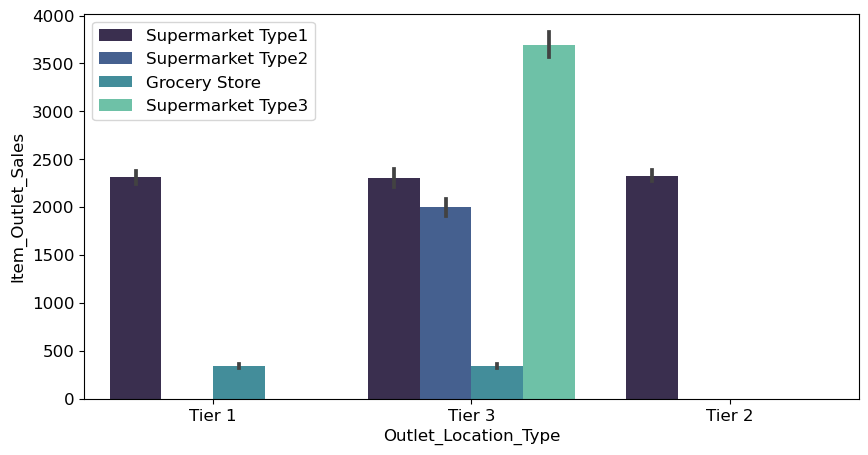

In [37]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='mako')
plt.legend()

In [ ]:
 Feature Engineering

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


<AxesSubplot:>

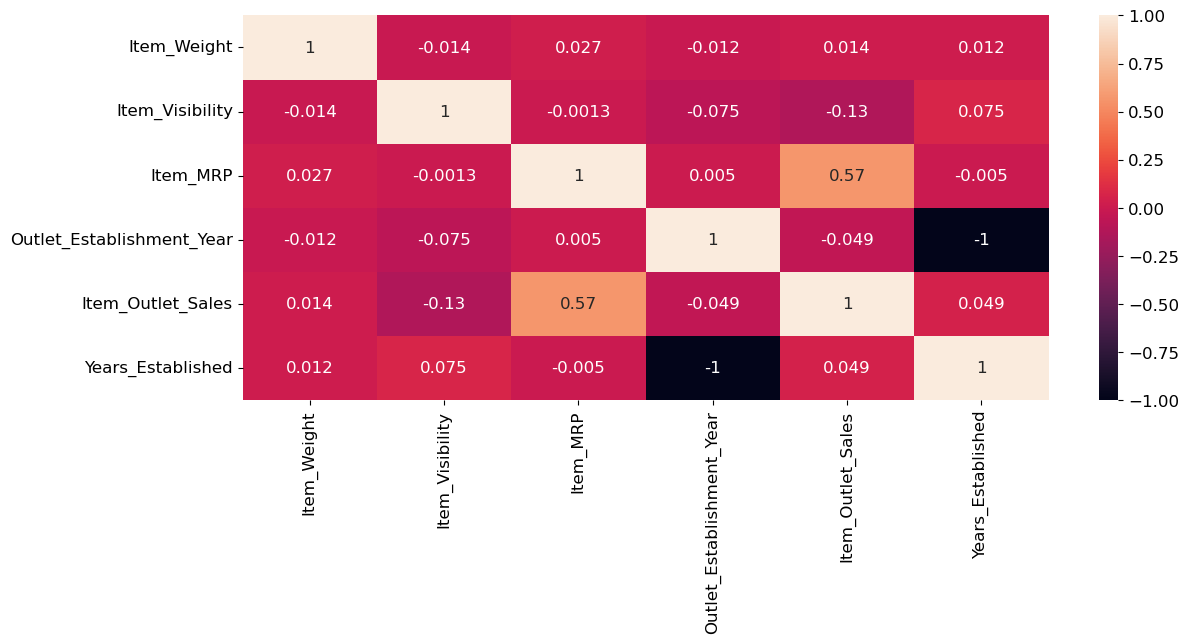

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [ ]:
Data Normalization

In [50]:
from sklearn.preprocessing import StandardScaler

item_weight = df['Item_Weight']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the 'Item_Weight' column
scaler.fit(item_weight.values.reshape(-1, 1))

# Transform the 'Item_Weight' column
item_weight_scaled = scaler.transform(item_weight.values.reshape(-1, 1))

# Replace the 'Item_Weight' column in the data with the normalized version
df['Item_Weight'] = item_weight_scaled

In [ ]:
Item_Visibility

In [51]:
item_weight = df['Item_Visibility']
scaler = StandardScaler()

scaler.fit(item_weight.values.reshape(-1, 1))

item_weight_scaled = scaler.transform(item_weight.values.reshape(-1, 1))

df['Item_Visibility'] = item_weight_scaled

In [ ]:
Item_MRP

In [52]:
item_weight = df['Item_MRP']
scaler = StandardScaler()

scaler.fit(item_weight.values.reshape(-1, 1))

item_weight_scaled = scaler.transform(item_weight.values.reshape(-1, 1))

df['Item_MRP'] = item_weight_scaled

In [53]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,-0.766217,Low Fat,-0.970732,Dairy,1.747454,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,-1.494175,Regular,-0.908111,Soft Drinks,-1.489023,Medium,Tier 3,Supermarket Type2,443.4228,13
2,0.999834,Low Fat,-0.956917,Meat,0.010040,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,1.365966,Regular,-1.281758,Fruits and Vegetables,0.660050,NaN,Tier 3,Grocery Store,732.3800,24
4,-0.845905,Low Fat,-1.281758,Household,-1.399220,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...
8518,-1.290648,Low Fat,-0.181193,Snack Foods,1.180783,High,Tier 3,Supermarket Type1,2778.3834,35
8519,-0.964360,Regular,-0.371154,Baking Goods,-0.527301,NaN,Tier 2,Supermarket Type1,549.2850,20
8520,-0.486234,Low Fat,-0.599784,Health and Hygiene,-0.897208,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,-1.216345,Regular,1.532880,Snack Foods,-0.607977,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [ ]:
Correlation



In [56]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Established
Item_Weight,1.000000,-0.014048,0.027141,0.014123,0.011588
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.027141,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135
Years_Established,0.011588,0.074834,-0.005020,0.049135,1.000000


In [ ]:
Categorical encoding

In [57]:
item_fat=df['Item_Fat_Content']
item_fat.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [58]:
item_types=df['Item_Type']
item_types.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [59]:
Outlet_size=df['Outlet_Size']
Outlet_size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [60]:
Outlet_Location_Type=df['Outlet_Location_Type']
Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [61]:
Outlet_Type=df['Outlet_Type']
Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler

item_weight = df['Item_Weight']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the 'Item_Weight' column
scaler.fit(item_weight.values.reshape(-1, 1))

# Transform the 'Item_Weight' column
item_weight_scaled = scaler.transform(item_weight.values.reshape(-1, 1))

# Replace the 'Item_Weight' column in the data with the normalized version
df['Item_Weight'] = item_weight_scaled

In [66]:
item_weight = df['Item_Visibility']
scaler = StandardScaler()

scaler.fit(item_weight.values.reshape(-1, 1))

item_weight_scaled = scaler.transform(item_weight.values.reshape(-1, 1))

df['Item_Visibility'] = item_weight_scaled

In [67]:
item_weight = df['Item_MRP']
scaler = StandardScaler()

scaler.fit(item_weight.values.reshape(-1, 1))

item_weight_scaled = scaler.transform(item_weight.values.reshape(-1, 1))

df['Item_MRP'] = item_weight_scaled

In [68]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,-0.766217,Low Fat,-0.970732,Dairy,1.747454,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,-1.494175,Regular,-0.908111,Soft Drinks,-1.489023,Medium,Tier 3,Supermarket Type2,443.4228,13
2,0.999834,Low Fat,-0.956917,Meat,0.010040,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,1.365966,Regular,-1.281758,Fruits and Vegetables,0.660050,NaN,Tier 3,Grocery Store,732.3800,24
4,-0.845905,Low Fat,-1.281758,Household,-1.399220,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...
8518,-1.290648,Low Fat,-0.181193,Snack Foods,1.180783,High,Tier 3,Supermarket Type1,2778.3834,35
8519,-0.964360,Regular,-0.371154,Baking Goods,-0.527301,NaN,Tier 2,Supermarket Type1,549.2850,20
8520,-0.486234,Low Fat,-0.599784,Health and Hygiene,-0.897208,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,-1.216345,Regular,1.532880,Snack Foods,-0.607977,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [ ]:
One-hot Encoding (Item_Fat_Content)


In [72]:
item_type_dummies = pd.get_dummies(df['Item_Fat_Content'])
df = pd.concat([df, item_type_dummies], axis=1)
df.drop('Item_Fat_Content', axis=1, inplace=True)

In [ ]:
One-hot Encoding ( Outlet_Type )


In [74]:
item_type_dummies = pd.get_dummies(df['Outlet_Type'])
df = pd.concat([df, item_type_dummies], axis=1)
df.drop('Outlet_Type', axis=1, inplace=True)

In [ ]:
One-hot Encoding (Oulet_Size)



In [75]:
item_type_dummies = pd.get_dummies(df['Outlet_Size'])
df = pd.concat([df, item_type_dummies], axis=1)
df.drop('Outlet_Size', axis=1, inplace=True)

In [ ]:
Conclusion
Item_MRP clearly maximises the Outlet sales.
Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.